In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [288]:
df = pd.read_csv('/content/drive/MyDrive/Data S/Housing.csv')
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


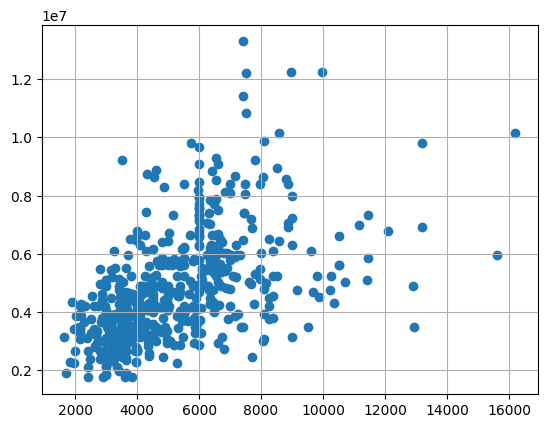

In [289]:
plt.scatter(data=df, x='area', y='price')
plt.grid()
plt.show()

# Формуємо вектор даних Х та У

In [326]:
X_ones=np.ones(545).reshape(-1,1)
X_area=np.expand_dims(df.area, axis=1)
X_bathroom=np.expand_dims(df.bathrooms, axis=1)
X_bedrooms=np.expand_dims(df.bedrooms, axis=1)

In [327]:
Y=np.array(df['price'])

In [295]:
X=np.hstack([
    X_ones,
    X_area,
    X_bathroom,
    X_bedrooms,
    ])
print(X)
print(X.shape)

[[1.00e+00 7.42e+03 2.00e+00 4.00e+00]
 [1.00e+00 8.96e+03 4.00e+00 4.00e+00]
 [1.00e+00 9.96e+03 2.00e+00 3.00e+00]
 ...
 [1.00e+00 3.62e+03 1.00e+00 2.00e+00]
 [1.00e+00 2.91e+03 1.00e+00 3.00e+00]
 [1.00e+00 3.85e+03 1.00e+00 3.00e+00]]
(545, 4)


#Знайдемо аналітичне рішення

In [332]:
def analytic_eq(x,y):
  return np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

analitic_w=analytic_eq(X,Y)
analitic_w

array([-1.73171608e+05,  3.78762754e+02,  1.38604950e+06,  4.06820034e+05])

# Власний алгоритм

Створимо вектор початкових данних W для власного алгоритму

In [ ]:
W=np.array([-1.7E+05,370,1.3E+06,4E+05])

Функція гіпотези лінійної регресії у векторному вигляді

In [309]:
#Модель Гіпотези
def model_h(w , x):
  return  x @ w

Функція втрат

In [299]:
# Vector cost
def cost2(w, x, y):
  h = model_h(w, x)
  return np.mean((h-y)**2)/2

Визначаємо зміну вагів. Градієнтний спуск

In [301]:
#Визначаємо w
def update_w2(w, x, y, lr):
  m=len(y)
  h= model_h(w, x)
  w = w - (lr/m)*x.T @ (h-y)

  return w

Навчаємо модель

In [303]:
def fit(w, x, y, lr, iteration):
  acc=1
  last_cost=1E+25
  for i in range(iteration+1):
    w=update_w2(w=w, x=x, y=y, lr=lr)
    new_cost=cost2(w, x, y)
    #print(i, w, new_cost)
    if last_cost-new_cost<acc:
      break
    last_cost=new_cost
  print(i, w, new_cost)
  return(w,new_cost)

In [304]:
new_w, my_cost=fit(W,X,Y, lr=0.00000001, iteration=5000000)

5000000 [-1.69240671e+05  3.98569982e+02  1.30186788e+06  4.02736337e+05] 897185058693.1385


In [330]:
print(new_w, my_cost)

[-1.69240671e+05  3.98569982e+02  1.30186788e+06  4.02736337e+05] 897185058693.1385


# Алгорит Scikit-learn

In [352]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, Y)
sciki_w=np.array([lr.intercept_, *lr.coef_], dtype='float64')
print(lr.intercept_)
print(lr.coef_)


-173171.60763263144
[0.00000000e+00 3.78762754e+02 1.38604950e+06 4.06820034e+05]


In [355]:
sciki_w

array([-1.73171608e+05,  0.00000000e+00,  3.78762754e+02,  1.38604950e+06,
        4.06820034e+05])

# Аналіз результатів

In [344]:
# Коефіцієнти аналітичного рішення
analitic_w

array([-1.73171608e+05,  3.78762754e+02,  1.38604950e+06,  4.06820034e+05])

In [334]:
#Коефіцієнти власного рішення
new_w

array([-1.69240671e+05,  3.98569982e+02,  1.30186788e+06,  4.02736337e+05])

In [356]:
#Коефіцієнти Scikit-learn
sciki_w=np.delete(sciki_w,1,0)
sciki_w

array([-1.73171608e+05,  3.78762754e+02,  1.38604950e+06,  4.06820034e+05])

In [387]:
dres=pd.DataFrame(
    [analitic_w,
     new_w,
     sciki_w],
    index=['analitic', 'my_alg', 'sciki'],
    columns=['w0','w1','w2','w3']
    )


In [386]:
cost_data=[
    cost2(analitic_w,X,Y),
    cost2(new_w,X,Y),
    cost2(sciki_w,X,Y),
]

In [398]:
dres['Cost_fun']=cost_data
dres

,w0,w1,w2,w3,Cost_fun
analitic,-173171.607633,378.762754,1.386049e+06,406820.033769,8.955850e+11
my_alg,-169240.670920,398.569982,1.301868e+06,402736.336563,8.971851e+11
sciki,-173171.607633,378.762754,1.386049e+06,406820.033769,8.955850e+11


In [399]:
dres.describe()

,w0,w1,w2,w3,Cost_fun
count,3.000000,3.000000,3.000000e+00,3.000000,3.000000e+00
mean,-171861.295395,385.365163,1.357989e+06,405458.801367,8.961184e+11
std,2269.527369,11.435709,4.860228e+04,2357.723681,9.237799e+08
min,-173171.607633,378.762754,1.301868e+06,402736.336563,8.955850e+11
25%,-173171.607633,378.762754,1.343959e+06,404778.185166,8.955850e+11
50%,-173171.607633,378.762754,1.386049e+06,406820.033769,8.955850e+11
75%,-171206.139277,388.666368,1.386049e+06,406820.033769,8.963850e+11
max,-169240.670920,398.569982,1.386049e+06,406820.033769,8.971851e+11


Як видно з результатів sciki та аналітичний метод показил 100% співпадіння по всім коефіцієнтам.



In [400]:
#Як видно з результатів sciki та аналітичний метод показил 100% співпадіння по всім коефіцієнтам.
#Відношення визначенних коефіцієнтів власним алгоритмом до отриманих не перевищує 6%
dres.loc['my_alg']/dres.loc['analitic']*100

w0           97.730034
w1          105.229455
w2           93.926507
w3           98.996191
Cost_fun    100.178658
dtype: float64

In [418]:
#Відношення достовірних результатів до визначенних втрат власним алгоритмом склада є 99,8%
dres.loc['analitic','Cost_fun']/dres.loc['my_alg','Cost_fun']*100

99.82166068315833

In [ ]:
# Кількість виконаних ітерацій 5млн

In [ ]:
# власний розрахунок дуже залежить від первинних данних W, з яких починаэмо градієнтний спуск. Особливи коли не використовується нормалізація даних